**VGG16モデルによる画像認識**

In [1]:
# google driveをマウント 
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# unixコマンドを使用するときは，先頭に%を付ける
%pwd

'/content'

In [3]:
%ls

drive/  sample_data/


In [4]:
# 作業フォルダに移動
%cd drive/My\ Drive/google_ML/week1code

/content/drive/My Drive/google_ML/week1code


In [5]:
%ls

c1-1.ipynb  c1-3.ipynb       s-1.ipynb    sample.py
c1-2.ipynb  cmx_labeled.csv  sample_fig/  week1.xlsx


## ライブラリの読み込み

In [6]:
#@title デフォルトのタイトル テキスト
import sys
import time
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.applications.vgg19 import VGG19 
from keras.applications.densenet import DenseNet201 

from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# 学習済みのVGG16をロード
# 構造とともに学習済みの重みも読み込まれる
model = VGG16(weights='imagenet')
#model = VGG19(weights='imagenet')
#model = DenseNet201(weights='imagenet')
# モデルの構造を表示
# model.summary()

# from keras.utils import plot_model
# plot_model(model, to_file='model.png')

553467904/553467096 [==============================] - 3s 0us/step


## 読み込む画像を設定

In [7]:
# 画像のファイル名を指定
filename = "sample_fig/fig2.jpg"

# 引数で指定した画像ファイルを読み込む
# サイズはVGG16のデフォルトである224x224にリサイズされる
img = image.load_img(filename, target_size=(224, 224))


# 読み込んだPIL形式の画像をarrayに変換
x = image.img_to_array(img)

# 3次元テンソル（rows, cols, channels) を
# 4次元テンソル (samples, rows, cols, channels) に変換
x = np.expand_dims(x, axis=0)

n=5
# Top-nのクラスを予測する
# VGG16の1000クラスはdecode_predictions()で文字列に変換される

start = time.time()

# 推論の処理
print("推論開始")
# VGG16に画像xを入力
preds = model.predict(preprocess_input(x))
print("推論終了")

end = time.time()
process_time = end -start

# 推論結果を取得
results = decode_predictions(preds, top=n)[0]

print ("process_time= {:.2g}".format(process_time/60) + "[min]")

推論開始
推論終了
40960/35363 [==================================] - 0s 0us/step
process_time= 0.11[min]


## 認識結果を表示

認識結果(Top5)
('n02690373', 'airliner', 0.93516546)
('n04592741', 'wing', 0.040212277)
('n04552348', 'warplane', 0.01952894)
('n03773504', 'missile', 0.002316629)
('n04008634', 'projectile', 0.0015750589)


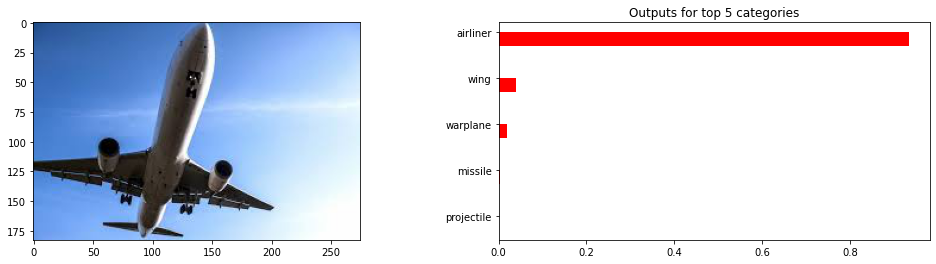

In [8]:
print("認識結果(Top%d)" % n)
for result in results:
    print(result)

fig, (axL, axR) = plt.subplots(ncols=2, figsize=(17,4))
img = plt.imread(filename)
axL.imshow(img)


a=np.array(results)
l=a[:,1]
# v= a[:,2].astype(np.float128)
v= a[:,2].astype(np.float64) #win
l=l[::-1]
v=v[::-1]    
    
height1 = v 
left = np.arange(len(height1))  
labels = l
height = 0.3
axR.barh(left, height1, color='r', height=height, align='center')
plt.title("Outputs for top 5 categories") 
plt.yticks(left + height/2, labels)
plt.rcParams["font.size"]=12

# plt.savefig('test.png')

plt.show()